In [105]:
import pandas as pd
import numpy as np
import unidecode

import matplotlib.pyplot as plt
%matplotlib inline
import datetime

import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

### Part 1

#### Выгрузка

In [106]:
columns = ['punct_num', 'PL', 'name_punct', 'invoice', 'filia_num', 'income', 'cost']

In [107]:
df_main  =  pd.read_excel('Analyst_excel.xlsx', sheet_name='data')

In [108]:
df_main.head()

,№ Статьи,PL,Статья,Счет,№ отдела,Доход,Затраты
0,_10.1.1.1.12,COGS,Переменные расходы -прочие (изменение запасов ...,914 000,(blank),44556.0,654512.0
1,_14.1.4,Маркетинг,Представительские расходы,829 400,18-314,9000.7,526548.0
2,_14.1.4,Маркетинг,Представительские расходы,829 400,18-315,4308.8,656.0
3,_14.1.4,Маркетинг,Представительские расходы,829 400,18-316,866.8,546315.0
4,_14.1.4,Маркетинг,Представительские расходы,829 400,18-338,9668.1,515.0


In [109]:
df_main.columns = columns

In [112]:
df_main.head()

,punct_num,PL,name_punct,invoice,filia_num,income,cost
0,_10.1.1.1.12,COGS,Переменные расходы -прочие (изменение запасов ...,914 000,(blank),44556.0,654512.0
1,_14.1.4,Маркетинг,Представительские расходы,829 400,18-314,9000.7,526548.0
2,_14.1.4,Маркетинг,Представительские расходы,829 400,18-315,4308.8,656.0
3,_14.1.4,Маркетинг,Представительские расходы,829 400,18-316,866.8,546315.0
4,_14.1.4,Маркетинг,Представительские расходы,829 400,18-338,9668.1,515.0


In [113]:
df_main.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   punct_num   5 non-null      object 
 1   PL          5 non-null      object 
 2   name_punct  5 non-null      object 
 3   invoice     5 non-null      object 
 4   filia_num   5 non-null      object 
 5   income      5 non-null      float64
 6   cost        5 non-null      float64
dtypes: float64(2), object(5)
memory usage: 408.0+ bytes


In [114]:
df_main.shape

(24658, 7)

In [115]:
df_main['invoice'] = df_main.invoice.astype('str')
df_main['invoice'] = df_main.invoice.apply(lambda x: unidecode.unidecode(x))\
.apply(lambda x: x.replace(" ", ""))

<AxesSubplot:>

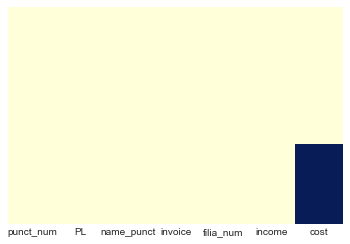

In [116]:
#наличие пропущеных значений
sns.heatmap(df_main.isna(),cbar=False,yticklabels=False,cmap="YlGnBu")

In [117]:
df_main['cost'] = df_main['cost'].fillna(0)


In [118]:
#заменила некорректный для синтаксиса символ и привела к правильному типу
df_main['cost'] = df_main.cost.astype('str').apply(lambda x: x.replace(',','.'))\
.astype('float')

##### 1. Найдите общую сумму Дохода

In [119]:
#общая сумма дохода
round(df_main.income.sum())

272611744

##### 2. Определите кол-во строк в таблице по заданным ниже критериям

In [120]:
#проверила где находится категория 'Логистика'
df_main.PL.unique()

array(['COGS', 'Маркетинг', 'Коммерция', 'Логистика', 'Производство',
       'Технический отдел', 'Лаборатория', 'R&D', 'Администрация',
       'Below EBITDA', 'Продажа', nan], dtype=object)

In [121]:
#смотрим количество строк по категории Логистика
s = df_main.query("PL=='Логистика'").shape
print(f" Логистика, кол-во строк {s[0]}")

 Логистика, кол-во строк 3468


In [122]:
#проверила на вхождение значения столбец
'Обучение персонала' in df_main.name_punct.unique()

True

In [123]:
#смотрим количество строк по пункту 'Обучение персонала'
s = df_main.query("name_punct=='Обучение персонала'").shape
print(f" Обучение персонала, кол-во строк {s[0]}")

 Обучение персонала, кол-во строк 290


In [126]:
#количество строк по счету 773200
s =df_main.query("invoice=='773200'").shape
print(f" Cчет 773200, кол-во строк {s[0]}")

 Cчет 773200, кол-во строк 145


###### 3. Найдите наибольшее значение в колонке Доход. Укажите счет, отдел и значение

In [129]:
#значение максималького дохода
df_main.income.max()

9850542.0

In [130]:
#по максимальному значению находим нужные данные о номере счета и отдела
df_main.loc[df_main['income'] == df_main.income.max()]


,punct_num,PL,name_punct,invoice,filia_num,income,cost
5870,_2.1.2,NaN,Экспорт,621100,(blank),9850542.0,4702.0


In [131]:
print(f"наибольший доход: {df_main.income[5870]},\nсчет: {df_main.invoice[5870]},\nотдел: {df_main.income[5870]},\nзначение: {df_main.name_punct[5870]}")

наибольший доход: 9850542.0,
счет: 621100,
отдел: 9850542.0,
значение: Экспорт


###### 4. Объедините значение ячеек фамилия имя отчество в одну ячейку с одинарными знаками пробела между словами

In [132]:
df_task_4 = pd.read_csv('Analyst.xlsx - task4part1.csv')

In [133]:
df_task_4

,Фамилия,Имя,Отчество
0,Иванов,Иван,Иванович
1,Orlova,Aina,NaN
2,Смит,Джон,Андреевич
3,Alevtina,Inga,NaN
4,Valentīna,Zakse,NaN
5,Петрова,Елена,Дмитриевна
6,Zebele,Antra,NaN
7,Soms,Rihards,NaN


In [134]:
df_task_4['Отчество'] = df_task_4['Отчество']. fillna (' ')

In [135]:
df_task_4['ФИО'] = df_task_4['Фамилия']+' '+df_task_4['Имя']+' '+df_task_4['Отчество']

In [136]:
df_task_4

,Фамилия,Имя,Отчество,ФИО
0,Иванов,Иван,Иванович,Иванов Иван Иванович
1,Orlova,Aina,,Orlova Aina
2,Смит,Джон,Андреевич,Смит Джон Андреевич
3,Alevtina,Inga,,Alevtina Inga
4,Valentīna,Zakse,,Valentīna Zakse
5,Петрова,Елена,Дмитриевна,Петрова Елена Дмитриевна
6,Zebele,Antra,,Zebele Antra
7,Soms,Rihards,,Soms Rihards


##### 5. Найдите среднее значение колонки Затраты для статьи командировочные расходы и счета 757100

In [137]:
#проверила на вхождение значения столбец
'Командировочные расходы' in df_main.name_punct.unique()

True

In [140]:
df_main.query("name_punct=='Командировочные расходы'" and "invoice=='757100'")\
.cost.mean()


7314.0

In [141]:
df_main.loc[((df_main['name_punct'] == 'Командировочные расходы') &(df_main['invoice' ] == '757100'))]\
.cost.mean()

7314.0

###### 6. Найдите ТОП 100 Счетов , Рассчитайте Доход, Затрати , РОИ

не совсем поняла топ 100 относительно чего, поэтому тут топ по доходу среди всех и выборка топ смых частых номеров счета

##### 1

In [142]:
df_top = df_main.groupby('invoice')\
.agg({'income':'sum', 'cost':'sum'})\
.query('cost!=0')\
.sort_values('income', ascending=False).head(100)

In [143]:
# содержит список чеков, у которых был наивысший доход
df_top['ROI'] = ((df_top['income']-df_top['cost'])/df_top['cost'])*100
df_top.sort_values('ROI', ascending=False)

,income,cost,ROI
invoice,,,
611410,9358521.0,4752.0,196838.573232
611165,9242311.0,4723.0,195587.296210
661000,8106755.0,4532.0,178778.089144
611161,8367052.0,4722.0,177092.969081
621112,7957474.0,4701.0,169171.942140
...,...,...,...
772800,725831.9,2080025.0,-65.104655
773500,729913.8,25263563.0,-97.110804
722400,768468.4,31841212.0,-97.586560


##### 2

In [144]:
#находим самые частоповторяющиеся номера чеков
#берем первые 100 из них
top_inv = df_main['invoice'].value_counts().head(100).to_frame().reset_index()
top_inv =top_inv.rename(columns = {'index':'checks'})
checks = top_inv.checks.to_list()

In [145]:
#Выводим строки датафрейма, где они содержаться
df_tops = df_main.query("invoice in @checks").groupby('invoice')\
.agg({'income':'sum', 'cost':'sum'})
df_tops

,income,cost
invoice,,
711311,732087.2,1462325.0
711320,659758.8,1546860.0
711350,793606.2,1504520.0
711360,710956.9,1483350.0
711370,691570.8,1441300.0
...,...,...
829613,717121.6,1845705.0
841210,694169.6,762700.0
841300,727637.4,804750.0


In [146]:
#содержит данные о чеках, которые чаще всего встречались в таблице
df_tops['ROI'] = ((df_tops['income']-df_tops['cost'])/df_tops['cost'])*100
df_tops

,income,cost,ROI
invoice,,,
711311,732087.2,1462325.0,-49.936765
711320,659758.8,1546860.0,-57.348512
711350,793606.2,1504520.0,-47.251868
711360,710956.9,1483350.0,-52.070860
711370,691570.8,1441300.0,-52.017567
...,...,...,...
829613,717121.6,1845705.0,-61.146467
841210,694169.6,762700.0,-8.985237
841300,727637.4,804750.0,-9.582181


In [147]:
# на выполнение ушел час 13:48-14:40
# наибольшее количество времени ушло на работу с полем доход
#привела к нужному типу, заменила пропущенные значения на 0б и символ разделитель десятичных дробей

### Part 2

##### 1. Определите общую сумму по позиции "Наружная реклама"


In [148]:
'Наружная реклама' in df_main.name_punct.unique()

True

In [149]:
# не совсем поняла общую сумму чего, тут и доход и расход по позиции
df = df_main.groupby('name_punct')\
.agg({'income':'sum', 'cost':'sum'})\
.query("name_punct == 'Наружная реклама'")
df

,income,cost
name_punct,,
Наружная реклама,4822.8,2034.0


##### 2. Укажите суммы ДОХОДОВ всех "Отдел" для подразделения (PL) "R&D"


In [150]:
#сумма дохожов отделов подразделения
df_main.query("PL=='R&D'").groupby('filia_num').agg({'income':'sum'})

,income
filia_num,
03-142,796071.5
03-160,840905.0
24-380,859480.1
24-450,858426.5
25-010,908587.7
25-011,871906.8


##### 3. Укажите средние значения Затрат всех "Счет" попадающих в статью "Использованная электроэнергия"


In [151]:
#средний расход каждого счета по статье
df_main.query("name_punct=='Использованная электроэнергия'")\
.groupby('invoice').agg({'cost':'mean'})

,cost
invoice,
711410,3941.0
711411,3942.0
711420,3940.0
711440,3938.0
711460,3939.0


###### 4. Создайте сводную таблицу оставив 4 колонки указанные ниже, а так же добавьте еще одну  колонки, в которых значение  Доход и Затрати делится на 8 и 15 соответственно, используйте разделитель по тысячам и оставьте 1 знак после запятой 


In [152]:
d=df_main[['PL','filia_num', 'invoice', 'income', 'cost']]
d
#.pivot(index='PL', columns='filia_num', values=['income', 'cost'])

,PL,filia_num,invoice,income,cost
0,COGS,(blank),914000,44556.0,654512.0
1,Маркетинг,18-314,829400,9000.7,526548.0
2,Маркетинг,18-315,829400,4308.8,656.0
3,Маркетинг,18-316,829400,866.8,546315.0
4,Маркетинг,18-338,829400,9668.1,515.0
...,...,...,...,...,...
24653,Администрация,24-300,841200,2514.8,0.0
24654,Администрация,24-490,841200,8022.7,0.0
24655,Администрация,24-500,841200,977.1,0.0
24656,Администрация,24-520,841200,403.1,0.0


In [153]:
d.nunique()

PL              11
filia_num      146
invoice        455
income       21945
cost         14443
dtype: int64

In [154]:
#группируем данные, суммируя значения
df_for_pivot = d.groupby(['PL', 'filia_num', 'invoice'])\
.agg({'income':'sum', 'cost':'sum'})


df_for_pivot

income     cost
PL                filia_num invoice                  
Below EBITDA      (blank)   611110   22401.0   4727.0
                            611140   19246.0   4735.0
                            611160   84533.0   4725.0
                            611181   42469.0   4692.0
                            611200   29846.0   4717.0
...                                      ...      ...
Технический отдел 24-510    841210     374.3   5284.0
                            841300    7894.8   5574.0
                            882000    4281.6  11142.0
                            901000    6992.4      0.0
                            902000    1280.5  12608.0

[24642 rows x 2 columns]

In [155]:
#добавляю столбцы
df_for_pivot['income_new'] = df_for_pivot['income']/8
df_for_pivot['income_new'] = df_for_pivot.income_new\
                             .apply(lambda x: round(x,1))

df_for_pivot['cost_new'] = df_for_pivot['cost']/15
df_for_pivot['cost_new'] = df_for_pivot.cost_new\
                             .apply(lambda x: round(x,1))

In [156]:
#СОбираю таблицу, тут не вышло использовать разделитель потысячам, 
#а так же реализовать разделитель символом "," из-за особенностей синтаксиса
df_pivot = df_for_pivot.stack().to_frame()
df_pivot

0
PL                filia_num invoice                    
Below EBITDA      (blank)   611110  income      22401.0
                                    cost         4727.0
                                    income_new   2800.1
                                    cost_new      315.1
                            611140  income      19246.0
...                                                 ...
Технический отдел 24-510    901000  cost_new        0.0
                            902000  income       1280.5
                                    cost        12608.0
                                    income_new    160.1
                                    cost_new      840.5

[98568 rows x 1 columns]

### Part 3

In [157]:
table_1 = pd.read_csv('Analyst.xlsx - table1.csv')
table_1

,Код города,Кол-во,Цена
0,1,26,93 470
1,4,100,15 436
2,4,84,85 030
3,1,58,17 080
4,5,24,64 494
...,...,...,...
775,3,56,2 847
776,2,66,31 807
777,8,43,41 337
778,4,9,39 085


In [158]:
names = ['city_code', 'amount', 'price']


In [159]:
table_1.columns = names
table_1

,city_code,amount,price
0,1,26,93 470
1,4,100,15 436
2,4,84,85 030
3,1,58,17 080
4,5,24,64 494
...,...,...,...
775,3,56,2 847
776,2,66,31 807
777,8,43,41 337
778,4,9,39 085


In [160]:
table_2 = pd.read_csv('Analyst.xlsx - table2.csv')
names = ['city_code', 'city_name']
table_2.columns = names
table_2

,city_code,city_name
0,1,Киев
1,2,Донецк
2,3,Харьков
3,4,Львов
4,5,Днепр
5,6,Енергодар
6,7,Кривой Рог
7,8,Белая Церковь
8,9,Ужгород
9,10,Севастополь


##### 2. Подставьте в таблицу 1 названия городов из таблицы 2 в соответствии с кодом города


In [161]:
#соединила таблицы 1 и 2
table_1 = table_1.merge(table_2, how='inner', on='city_code')
table_1

,city_code,amount,price,city_name
0,1,26,93 470,Киев
1,1,58,17 080,Киев
2,1,97,82 442,Киев
3,1,45,5 272,Киев
4,1,12,62 962,Киев
...,...,...,...,...
775,2,5,82 219,Донецк
776,2,18,62 422,Донецк
777,2,94,87 257,Донецк
778,2,16,34 900,Донецк


##### 1. Замените город Белая Церковь городом Умань на всем листе


In [164]:
#Заменила название городов
table_1['city_name'] = table_1.city_name\
                    .apply(lambda x: 'Умань' if x == 'Белая Церковь ' else x )

In [165]:
#проверила
table_1.query("city_code==8")

,city_code,amount,price,city_name
382,8,56,70 360,Умань
383,8,33,59 856,Умань
384,8,56,23 655,Умань
385,8,93,1 093,Умань
386,8,34,77 563,Умань
...,...,...,...,...
464,8,73,83 318,Умань
465,8,43,34 725,Умань
466,8,4,25 759,Умань
467,8,59,31 187,Умань


###### 3. Посчитать в таблице 1 Сумму Реализации 

In [166]:
# привела к нужному типу
table_1['price'] = table_1.price\
.astype('str')\
.apply(lambda x: unidecode.unidecode(x))\
.apply(lambda x:  x.replace(" ", ""))\
.astype('int')


In [167]:
table_1['amount'] = table_1.amount\
.astype('str')\
.apply(lambda x:  x.replace("  -   ", "0"))\
.astype('int')

In [168]:
table_1['selling'] = table_1['amount']*table_1['price']
table_1

,city_code,amount,price,city_name,selling
0,1,26,93470,Киев,2430220
1,1,58,17080,Киев,990640
2,1,97,82442,Киев,7996874
3,1,45,5272,Киев,237240
4,1,12,62962,Киев,755544
...,...,...,...,...,...
775,2,5,82219,Донецк,411095
776,2,18,62422,Донецк,1123596
777,2,94,87257,Донецк,8202158
778,2,16,34900,Донецк,558400


In [169]:
#сумма реализации
print(f" Сумма реализации: {table_1.selling.sum()}")

 Сумма реализации: 2008711296


##### 4. Посчитайте суммы реализации по каждому городу из таблицы 1 и подставьте значения в таблицу 2

In [170]:
table = table_1.groupby(['city_code', 'city_name'], as_index=False).agg({'selling':'sum'})
table

,city_code,city_name,selling
0,1,Киев,151840771
1,2,Донецк,185595895
2,3,Харьков,244162565
3,4,Львов,204728596
4,5,Днепр,201701142
5,6,Енергодар,198210609
6,7,Кривой Рог,182948249
7,8,Умань,204749546
8,9,Ужгород,227423511
9,10,Севастополь,207350412


In [171]:
#соединила с оригиналом таблица 2
table_2 = table.iloc[: , 0:3:2].merge(table_2, how='inner', on='city_code')
table_2 

,city_code,selling,city_name
0,1,151840771,Киев
1,2,185595895,Донецк
2,3,244162565,Харьков
3,4,204728596,Львов
4,5,201701142,Днепр
5,6,198210609,Енергодар
6,7,182948249,Кривой Рог
7,8,204749546,Белая Церковь
8,9,227423511,Ужгород
9,10,207350412,Севастополь


In [172]:
#проверила
table_2.iloc[7, 0:2] == table.iloc[7, 0:3:2]

city_code    True
selling      True
Name: 7, dtype: bool

##### 5. Проставьте в таблице 1 статус каждой строки из таблицы 3 в зависимости от реализации

In [173]:
def diff_by_class (x):
    if x > 5000000:
        return 'A'
    elif x < 1000000:
        return 'C'
    else:
        return 'B'

In [174]:
table_1['status'] = table_1.selling.apply(diff_by_class)
table_1

,city_code,amount,price,city_name,selling,status
0,1,26,93470,Киев,2430220,B
1,1,58,17080,Киев,990640,C
2,1,97,82442,Киев,7996874,A
3,1,45,5272,Киев,237240,C
4,1,12,62962,Киев,755544,C
...,...,...,...,...,...,...
775,2,5,82219,Донецк,411095,C
776,2,18,62422,Донецк,1123596,B
777,2,94,87257,Донецк,8202158,A
778,2,16,34900,Донецк,558400,C


##### 6. Проставить место по объёму реализации для каждой строки в таблице 1
##### 7. Найти города занявшие первые три места по объёмам реализации

In [175]:
#Отсортировали значение реализации по убыванию
table_1 = table_2.sort_values('selling', ascending=False)
table_1

,city_code,selling,city_name
2,3,244162565,Харьков
8,9,227423511,Ужгород
9,10,207350412,Севастополь
7,8,204749546,Белая Церковь
3,4,204728596,Львов
4,5,201701142,Днепр
5,6,198210609,Енергодар
1,2,185595895,Донецк
6,7,182948249,Кривой Рог
0,1,151840771,Киев


In [176]:
# топ 3 города по обьемам реалтзации
table_1.head(3)

,city_code,selling,city_name
2,3,244162565,Харьков
8,9,227423511,Ужгород
9,10,207350412,Севастополь


### Part 4

In [177]:
df = pd.read_csv('Analyst.xlsx - task4.csv')
df

,create_date,App number,Country,Cost
0,7/14/2022,28565,PH,"32,00"
1,7/14/2022,28565,BK,"22,33"
2,7/14/2022,21807,KZ,"2 708,67"
3,7/14/2022,21807,UA,"1 804,33"
4,7/14/2022,21807,PH,"3 642,33"
...,...,...,...,...
830,7/1/2022,21585,BR,"24,00"
831,7/1/2022,21585,BR,"154,67"
832,7/1/2022,21552,BR,"26,00"
833,7/1/2022,21276,BR,"343,67"


In [178]:
df['Cost'] = df.Cost.astype('str')\
.apply(lambda x: unidecode.unidecode(x))\
.apply(lambda x: x.replace(" ", ""))\
.apply(lambda x: x.replace(",", "."))\
.astype('float')

In [179]:
df_1 = df.groupby('Country', as_index=False).agg({'Cost':'sum'})
df_1

,Country,Cost
0,BK,390285.01
1,BR,804.34
2,BT,22782.02
3,BZ,1378.34
4,CB,2557.66
5,CL,17838.98
6,CZ,9593.65
7,GE,11692.00
8,HU,10422.64
9,KO,2361.01


In [180]:
table = pd.read_csv('Analyst.xlsx - task4_1.csv')


In [181]:
table.columns = ['Country', 'Site', 'Percent']
table['Percent'] = table.Percent.astype('str')\
.apply(lambda x: x.replace("%", ""))\
.astype('int')

table 

,Country,Site,Percent
0,WW,CVS,100
1,PH,KSS,100
2,BR,VBS,50
3,BR,CVS,50
4,UA,B77,100
5,AT,KDS,50
6,AT,CVS,50
7,PE,CDS,50
8,PE,KDS,50
9,MD,CDS,100


In [182]:
#индекс сайта для всех остальных стран
for_else = table.query("Country=='WW'").Site
for_else

0    CVS
Name: Site, dtype: object

In [183]:
# таблица для первого соединения
table_m = table.groupby('Country').Site.apply(list)\
.reset_index()


In [184]:
table_m

,Country,Site
0,AT,"[KDS, CVS]"
1,BR,"[VBS, CVS]"
2,CZ,"[MDD, CVS]"
3,MD,[CDS]
4,PE,"[CDS, KDS]"
5,PH,[KSS]
6,UA,[B77]
7,WW,[CVS]


In [185]:
#присоединила таблицу, раскрыла дубликаты
df = df_1.merge(table_m, how='left', on='Country')
df = df.explode('Site')
df

,Country,Cost,Site
0,BK,390285.01,NaN
1,BR,804.34,VBS
1,BR,804.34,CVS
2,BT,22782.02,NaN
3,BZ,1378.34,NaN
4,CB,2557.66,NaN
5,CL,17838.98,NaN
6,CZ,9593.65,MDD
6,CZ,9593.65,CVS
7,GE,11692.00,NaN


In [186]:
# делаем функцию проверяки вхождение кода страны в таблице 1
# если код страны есть в списке 2, то оставляем то же название, нет - заменяем WW
def country_cod (x):
        if x not in table_m.Country.to_list():
            return 'WW'
        else: 
            return x

In [187]:
# создала колонку квторой ключ для присоединения
df['country_key'] = df.Country.apply(country_cod)
df

,Country,Cost,Site,country_key
0,BK,390285.01,NaN,WW
1,BR,804.34,VBS,BR
1,BR,804.34,CVS,BR
2,BT,22782.02,NaN,WW
3,BZ,1378.34,NaN,WW
4,CB,2557.66,NaN,WW
5,CL,17838.98,NaN,WW
6,CZ,9593.65,MDD,CZ
6,CZ,9593.65,CVS,CZ
7,GE,11692.00,NaN,WW


In [188]:
#заполнили кодом сайта остальные страны
df['Site'] = df.Site.fillna(for_else[0])
df

,Country,Cost,Site,country_key
0,BK,390285.01,CVS,WW
1,BR,804.34,VBS,BR
1,BR,804.34,CVS,BR
2,BT,22782.02,CVS,WW
3,BZ,1378.34,CVS,WW
4,CB,2557.66,CVS,WW
5,CL,17838.98,CVS,WW
6,CZ,9593.65,MDD,CZ
6,CZ,9593.65,CVS,CZ
7,GE,11692.00,CVS,WW


In [189]:
#переименуем название ключа, для совпадения
table = table.rename(columns={'Country':'country_key'})

In [190]:
#теперь есть колонк, которая поможет получить верное количество процентов
df_new = pd.merge(df, table, on=['Site','country_key'])
df_new

,Country,Cost,Site,country_key,Percent
0,BK,390285.01,CVS,WW,100
1,BT,22782.02,CVS,WW,100
2,BZ,1378.34,CVS,WW,100
3,CB,2557.66,CVS,WW,100
4,CL,17838.98,CVS,WW,100
5,GE,11692.00,CVS,WW,100
6,HU,10422.64,CVS,WW,100
7,KO,2361.01,CVS,WW,100
8,KZ,159301.66,CVS,WW,100
9,LT,5619.33,CVS,WW,100


In [191]:
df_new['Percent'] = df_new.Percent.astype('int')

In [192]:
df_new['Cost_percent'] = df_new['Percent']/100*df_new['Cost']


In [193]:
df_needed = df_new[['Country', 'Site', 'Cost_percent']]
df_needed

,Country,Site,Cost_percent
0,BK,CVS,390285.01
1,BT,CVS,22782.02
2,BZ,CVS,1378.34
3,CB,CVS,2557.66
4,CL,CVS,17838.98
5,GE,CVS,11692.00
6,HU,CVS,10422.64
7,KO,CVS,2361.01
8,KZ,CVS,159301.66
9,LT,CVS,5619.33
